In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/Users/orion/RDaly2023/mcmc-fitting/Zhu_Rakshit_flagged_final367.csv', 
                 header=0, usecols=[0,1,4,5,8,9])
df

,SDSS Name,z_1,Log(L_5 GHz),Log(2 keV),logMBH,e_logMBH
0,000442.18+000023.3,1.008,32.09,26.91,9.281283,0.031152
1,000622.60-000424.4,1.038,34.94,27.32,8.823198,0.059579
2,001646.54-005151.7,2.243,32.66,26.36,9.011771,0.240900
3,001910.95+034844.6,2.022,32.91,26.54,8.696172,0.037866
4,003054.63+045908.4,2.201,33.81,26.59,8.688945,0.189143
...,...,...,...,...,...,...
362,222852.60-075346.6,0.638,33.12,26.83,8.546475,0.068004
363,231156.65+015324.5,2.257,32.54,26.34,8.784155,0.118988
364,232734.73+002234.0,1.494,33.56,26.96,9.709295,0.111279
365,234808.62+020725.8,1.872,32.84,26.61,9.817211,0.082521


In [3]:
df.rename(columns={'Log(L_5 GHz)':'logR', 'Log(2 keV)': 'logX'}, inplace=True)

In [4]:
x = df['logX']
y = df['logR']

Text(0, 0.5, 'log R')

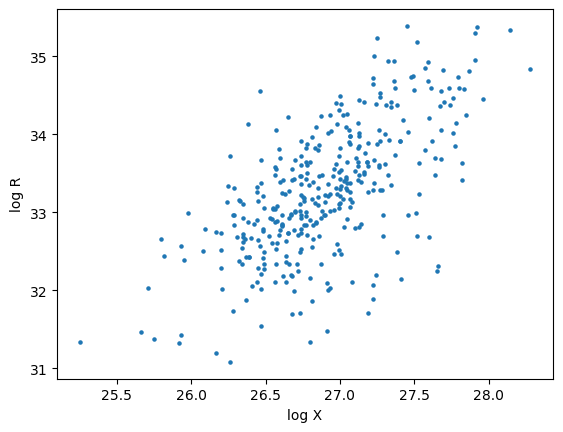

In [5]:
plt.scatter(x, y, s=5)
plt.xlabel('log X'); plt.ylabel('log R')

In [8]:
# 'true' values

m_true = 1.2299   # OLP fit as initial guesses 
b_true = 2.0901

f_true = 1.000   # random guess 

In [9]:
print(df['logX'].std())

#creating 1sigma error column for Xray luminosity
df['logX_err'] = df['logX'].std()

0.4623635564868918


In [10]:
x = df['logX']
y = df['logR']

yerr = df['logX_err']   #using 1sigma error in L_x as y-error

### Defining log-likelihood function

first term- $(y_n - model)^2/s_{n}^2$

second term- the intrinsic scatter $\sigma$ and the measurement error $\varepsilon_n$ on the point $(x_n, y_n)$,  added in quardrature


$$
ln  L = -0.5 \sum_{n} [\frac{(y_n-mx_n-b)^2}{s_{n}^2} + ln  (2\pi s_{n}^2)]
$$

where

$$
s_{n}^2 = \sigma_{n}^2 + f^2 (mx_n+b)^2
$$



In [11]:
# theta = [intercept, slope, scatter]
#def log_likelihood(theta, x, y, dy):
#    y_model = theta[0] + theta[1] * x
#    S = dy ** 2 + theta[2] ** 2
#    return -0.5 * np.sum(np.log(2 * np.pi * S) + (y - y_model) ** 2 / S)
    


def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b             # model --> y_model
    sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))


Maximum likelihood estimates:
m = 1.166
b = 1.893
f = 0.013


Text(0, 0.5, 'log R')

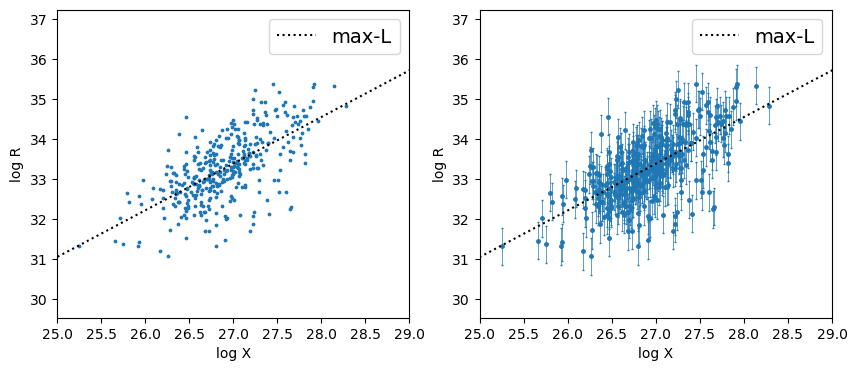

In [12]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true, np.log(f_true)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))


fig, ax = plt.subplots(1,2, figsize=(10, 4))

ax[0].scatter(x, y, s=3)
ax[1].errorbar(x, y, yerr=yerr, fmt='.', capsize=0.8, elinewidth=0.5, ms=5,  zorder=0)  #zorder plots on top

x0 = np.linspace(24, 30, 500)
ax[0].plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="max-L")
ax[0].legend(fontsize=14)
ax[0].set_xlim([25,29])
ax[0].set_xlabel('log X')
ax[0].set_ylabel('log R')

ax[1].plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="max-L")
ax[1].legend(fontsize=14)
ax[1].set_xlim([25,29])
ax[1].set_xlabel('log X')
ax[1].set_ylabel('log R')


In [ ]:
#                                2-parameter model:    y = a.x1 + b.x2 + const
#                                                  y = L_r   ,   x1 = L_x   ,   x2 = M_bh

In [13]:
# true values --> using OLP fit as initial guesses 

m1_true = 1.229
m2_true = -0.212
b_true = 2.090
f_true = 1.000   # random guess 

In [14]:
#df['logR_err'] = df['logR'].std()
df['logX_err'] = df['logX'].std()

In [15]:
#x1 = df['logX']
#x2 = df['logMBH']
#y = df['logR']

yerr = np.sqrt(df['logX_err']**2 + df['e_logMBH']**2)  # adding in quardrature 
yerr

0      0.463412
1      0.466186
2      0.521357
3      0.463912
4      0.499555
         ...   
362    0.467338
363    0.477429
364    0.475566
365    0.469670
366    0.472066
Length: 367, dtype: float64

In [16]:
x = df[['logX','logMBH']]
y = df['logR']

yerr = np.sqrt(df['logX_err']**2 + df['e_logMBH']**2)

In [17]:
x.keys()

Index(['logX', 'logMBH'], dtype='object')

In [ ]:
# x.values[:,0]   ;    x.values[:,1]

# to_numpy()is recommended against 'values'
x.to_numpy()[:,0]

In [ ]:
plt.scatter(x.to_numpy()[:,0] + x.to_numpy()[:,1], y, s=3)

In [19]:
def log_likelihood(theta, x1, x2, y, yerr):
    m1, m2, b, log_f = theta
    model = m1 * x1 + m2 * x2 + b             
    sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))


# also works--

#def log_likelihood(theta, x, y, yerr):
#    m1, m2, b, log_f = theta
#    model = m1 * x.to_numpy()[:,0] + m2 * x.to_numpy()[:,1] + b             
#    sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
#    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

#for:
# soln = minimize(nll, initial, args=(x, y, yerr))

In [20]:
x1 = x.to_numpy()[:,0]   
x2 = x.to_numpy()[:,1]

In [21]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m1_true, m2_true, b_true, np.log(f_true)]) + 0.1 * np.random.randn(4)
soln = minimize(nll, initial, args=(x1, x2, y, yerr))
m1_ml, m2_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("a = {0:.3f}".format(m1_ml))
print("b = {0:.3f}".format(m2_ml))
print("const = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))     


Maximum likelihood estimates:
a = 1.238
b = -0.229
const = 2.029
f = 0.012


In [22]:
x_new = m1_ml*x.to_numpy()[:,0] + m2_ml*x.to_numpy()[:,1] + b_ml

In [95]:
np.dot(np.vander(x0, 2), [m1_ml, m2_ml, b_ml])
#If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.

ValueError: shapes (500,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

Text(0, 0.5, 'log R')

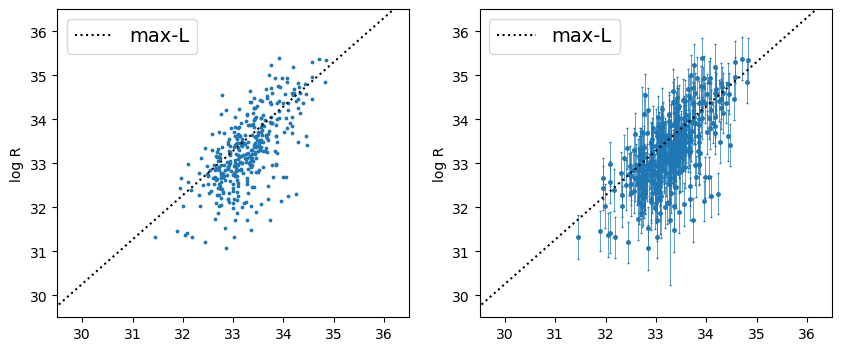

In [23]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))

ax[0].scatter(x_new, y, s=3)
ax[1].errorbar(x_new, y, yerr=yerr, fmt='.', capsize=0.8, elinewidth=0.5, ms=5,  zorder=0)  #zorder plots on top

x0 = np.linspace(24, 40, 500)
#y0=np.dot(np.vander(x0, 2), [m1_ml, b_ml]) + np.dot(np.vander(x0, 2), [m2_ml, b_ml])


y_line = m1_ml*x0 + m2_ml*x0       # + b_ml  or + np.log(b_ml)  -->removed

ax[0].plot(x0, y_line, ":k", label="max-L")
ax[0].legend(fontsize=14)
ax[0].set_xlim([29.5,36.5])
ax[0].set_ylim([29.5,36.5])
#ax[0].set_xlabel('log X')
ax[0].set_ylabel('log R')

ax[1].plot(x0, y_line, ":k", label="max-L")
ax[1].legend(fontsize=14)
ax[1].set_xlim([29.5,36.5])
ax[1].set_ylim([29.5,36.5])
#ax[1].set_xlabel('log X')
ax[1].set_ylabel('log R')


In [ ]:
# following emcee's fit to line tutorial


#Maximum likelihood estimates:
#a = 1.238
#b = -0.229
#const = 2.029
#f = 0.012


In [24]:
def log_prior(theta):
    m1, m2, b, log_f = theta
    if -5.0 < m1 < 5.0 and -5.0 < m2 < 5.0 and -3.0 < b < 8.0 and -5.0 < log_f < 5.0:
                            # use max-likelihood fit results to predict the range of params
        return 0.0
    return -np.inf

def log_probability(theta, x1, x2, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x1, x2, y, yerr)


In [25]:
import emcee

pos = soln.x + 0.05 * np.random.randn(32, 4)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(x1, x2, y, yerr)
)

sampler.run_mcmc(pos, 500, progress=True);

100%|██████████████████████████████████████████████| 500/500 [00:09<00:00, 53.33it/s]


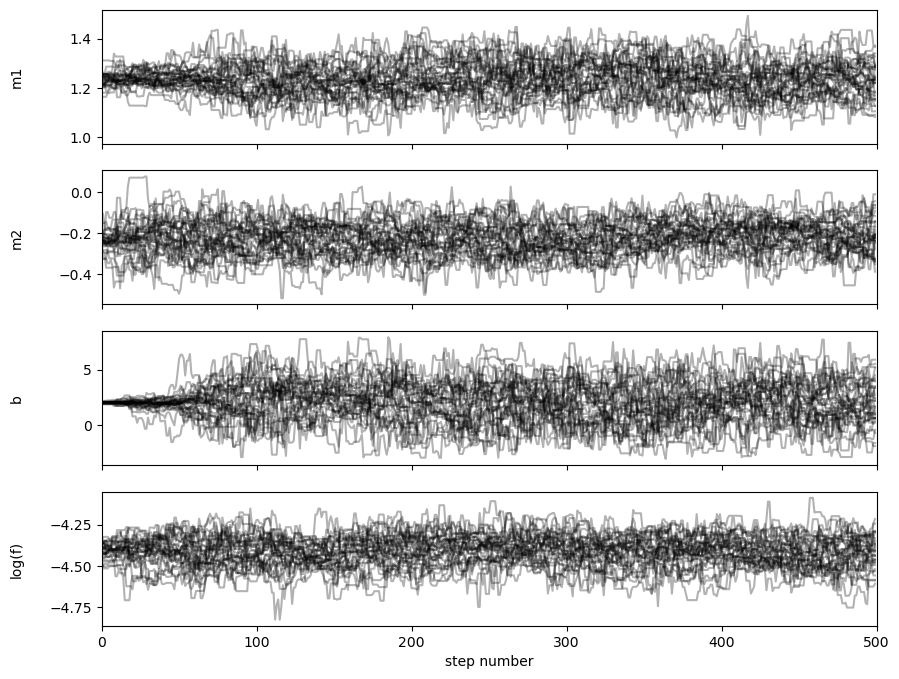

In [26]:
fig, axes = plt.subplots(4, figsize=(10, 8), sharex=True)
samples = sampler.get_chain()
labels = ["m1", "m2", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
tau = sampler.get_autocorr_time()
print(tau)

In [28]:
sampler.reset()
sampler.run_mcmc(pos, 5000, progress=True);

100%|████████████████████████████████████████████| 5000/5000 [01:34<00:00, 52.85it/s]


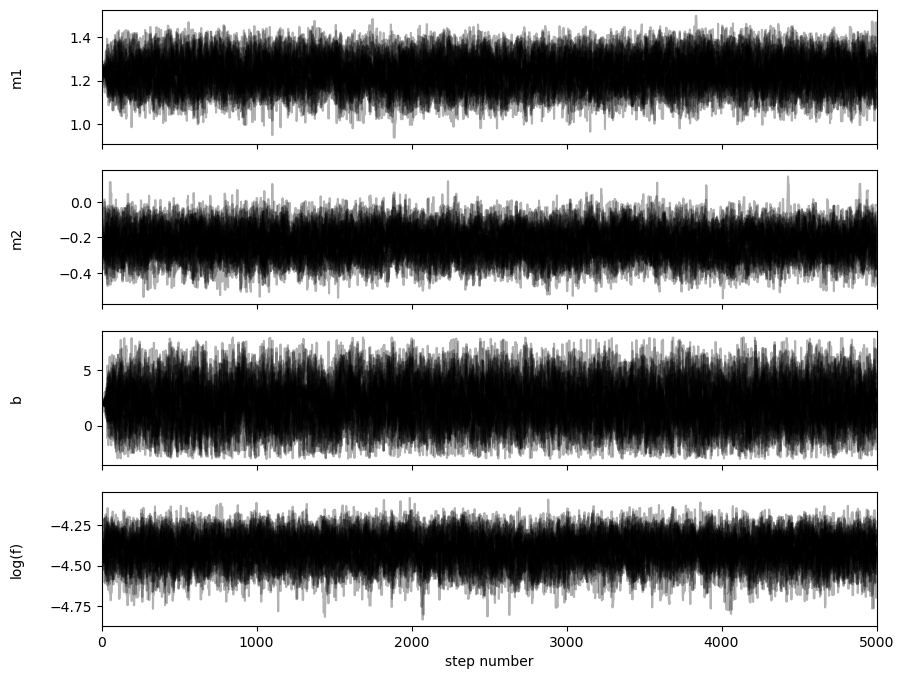

In [29]:
fig, axes = plt.subplots(4, figsize=(10, 8), sharex=True)
samples = sampler.get_chain()
labels = ["m1", "m2", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [30]:
log_f_ml = -4.5
np.exp(log_f_ml)

0.011108996538242306

In [31]:
tau = sampler.get_autocorr_time()
print(tau)

[45.8451552  44.19115699 44.16401562 52.74917376]


In [32]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 4)


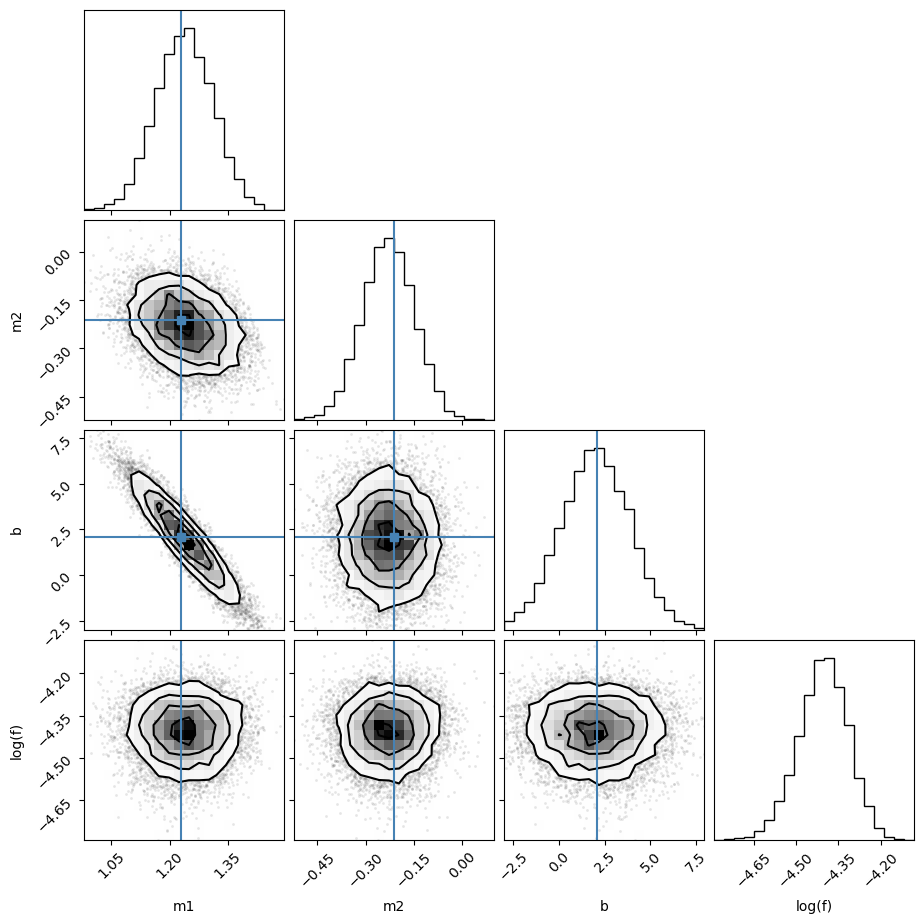

In [33]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[m1_true, m2_true, b_true, np.log(f_true)]
)

In [34]:
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
print(sample)

[ 1.28167487 -0.24231521  0.96392146 -4.4517219 ]


In [36]:
for ind in inds:
    sample = flat_samples[ind]
    print(sample)

[ 1.25186233 -0.22588555  1.59485643 -4.53247039]
[ 1.19293665 -0.22041168  3.13703209 -4.28244616]
[ 1.28647314 -0.33472164  1.64338003 -4.22314065]
[ 1.24534395 -0.30767356  2.52552759 -4.3413014 ]
[ 1.27050708 -0.21742804  1.04579441 -4.38482571]
[ 1.36950688 -0.33083771 -0.59649822 -4.44546893]
[ 1.17348649 -0.24798262  3.952521   -4.28556923]
[ 1.27950904 -0.19133355  0.56843514 -4.35093669]
[ 1.01016274 -0.1143107   7.14653243 -4.32220674]
[ 1.28321922 -0.29119355  1.36270591 -4.2694587 ]
[ 1.17622644 -0.33170713  4.62229202 -4.59827403]
[ 1.26011786 -0.27296207  1.81040529 -4.31592773]
[ 1.36910133 -0.24850719 -1.33389226 -4.37160929]
[ 1.17324825 -0.30893385  4.49508415 -4.45105425]
[ 1.28532327 -0.19081991  0.44014939 -4.40441141]
[ 1.23242493 -0.26846438  2.54276928 -4.32370457]
[ 1.17032777 -0.27840299  4.30313022 -4.4841518 ]
[ 1.18801408 -0.22703203  3.37354688 -4.41690425]
[ 1.20084615 -0.17041484  2.47455356 -4.22974104]
[ 1.23422984 -0.12978675  1.26065023 -4.44888646]


In [40]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>